

# Project: Investigate TMDb movie data
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I choose the 'TMDb movie data' dataset to explore in my project analysis. This dataset contains information on 10,000 movies collected from the Movie Database (TMDb), including user ratings and revenue.

#### Questions I will be searching for answers with this dataset:
- What is the budget for the most movies released?  
- What is the runtime for the most movies released?  
- Which genres are most popular from year to year?  
- What are the top-5 movies with the highest and lowest voted ratings?  
- Which a director made the most films?  
- What kinds of properties are associated with the most profitable movies?  
    
  

In [1]:
# import of necessary libraries to work with dataframe

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
# Loading data and printing out a few lines
df_MD = pd.read_csv('project_files/tmdb-movies.csv')
df_MD.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


We see that the data has been loaded in a readable form, as well as the names of all dataset columns

In [3]:
df_MD.shape #view to dataframe size

(10866, 21)

There are 10866 rows and 21 columns

In [4]:
df_MD.describe() #view descriptive statistics for each column of data

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df_MD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

We can see that some columns have missing values. I will try to fix some of them, and some drop this rows. 

In [6]:
sum(df_MD.duplicated()) # return the count of duplicate rows

1

We have only one duplicate row



### Data Cleaning 

In [7]:
df_MD.drop_duplicates(inplace = True) #drop duplicates

In [8]:
sum(df_MD.duplicated())

0

Now we see that there are no more duplicates

Let's delete columns that we definitely won't need for our data analysis

In [9]:
df_MD.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis = 1, inplace = True)

In [10]:
df_MD.head(3)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


Now there are only required columns and ready to move on to fix Nan rows

In [11]:
df_MD.fillna(df_MD.mean(), inplace = True) #fill null values with the mean values
df_MD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   cast                  10789 non-null  object 
 6   director              10821 non-null  object 
 7   runtime               10865 non-null  int64  
 8   genres                10842 non-null  object 
 9   production_companies  9835 non-null   object 
 10  release_date          10865 non-null  object 
 11  vote_count            10865 non-null  int64  
 12  vote_average          10865 non-null  float64
 13  release_year          10865 non-null  int64  
 14  budget_adj            10865 non-null  float64
 15  revenue_adj        

In [12]:
df_MD.shape

(10865, 16)

In [13]:
df_MD.dropna(inplace = True) #remove the rows that they have 'Nan' values
df_MD.shape

(9772, 16)

Because "zero" values for budget and revenue are considered invalid for film production, we need to check these columns for these values.

In [14]:
df_MD['budget_adj'].isin([0]).sum() #number of rows with '0' value in the 'budget_adj' column

4751

In [15]:
df_MD_clean = df_MD[df_MD['budget_adj'] != 0] #create a new dataset without null values
df_MD_clean['budget_adj'].isin([0]).sum() #check dataset for the number of rows with '0' value in the 'budget_adj' column

0

In [16]:
df_MD_clean['revenue_adj'].isin([0]).sum() #number of rows with '0' value in the 'revenue_adj' column

1216

In [17]:
df_MD_clean = df_MD_clean[df_MD_clean['revenue_adj'] != 0] #overwrite dataset by removing '0' values from 'revenue_adj'
df_MD_clean['revenue_adj'].isin([0]).sum() #check dataset for the number of rows with '0' value in the 'revenue_adj' column

0

In [18]:
df_MD_clean.shape #dataset size after transformations

(3805, 16)

In [19]:
df_MD_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3805 non-null   int64  
 1   popularity            3805 non-null   float64
 2   budget                3805 non-null   int64  
 3   revenue               3805 non-null   int64  
 4   original_title        3805 non-null   object 
 5   cast                  3805 non-null   object 
 6   director              3805 non-null   object 
 7   runtime               3805 non-null   int64  
 8   genres                3805 non-null   object 
 9   production_companies  3805 non-null   object 
 10  release_date          3805 non-null   object 
 11  vote_count            3805 non-null   int64  
 12  vote_average          3805 non-null   float64
 13  release_year          3805 non-null   int64  
 14  budget_adj            3805 non-null   float64
 15  revenue_adj         

The dataset is cleared and I can go to exploratorying data 

<a id='eda'></a>
## Exploratory Data Analysis


### Research Q 1: What is the budget for the most movies released?

To answer this question, we will construct a one-dimensional distribution histogram.

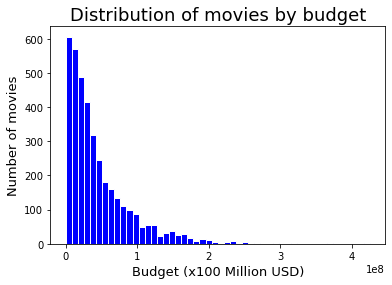

In [20]:
plt.hist(df_MD_clean['budget_adj'], density = False, bins = 50, color = 'blue', edgecolor = 'white')
plt.title('Distribution of movies by budget', size=18)
plt.ylabel('Number of movies', size=13)
plt.xlabel('Budget (х100 Million USD)', size=13);

The vast majority of the movies released were shot with a budget of under 10 million USD.

### Research Q 2: What is the runtime for the most movies released?

As in the previous question, we will use a one-dimensional histogram.

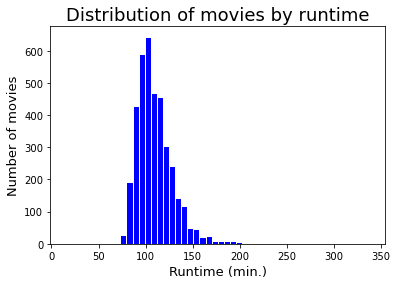

In [21]:
plt.hist(df_MD_clean['runtime'], density = False, bins = 50, color = 'blue', edgecolor = 'white')
plt.title('Distribution of movies by runtime', size=18)
plt.ylabel('Number of movies', size=13)
plt.xlabel('Runtime (min.)', size=13);

Most of the movies released are between 100 and 150 minutes in length.

### Research Q 3: Which genres are most popular from year to year?

To answer the question, let's first tidy up the 'genres' column. Let's get rid of the separator '|' and for each genre of a specific movie and create a new row.

In [22]:
df_MD_clean['genres'].str.contains('|') #column data containing the separator '|'

0        True
1        True
2        True
3        True
4        True
         ... 
10822    True
10828    True
10829    True
10835    True
10848    True
Name: genres, Length: 3805, dtype: bool

In [23]:
df_MD_clean['genres'].nunique() #view the number of unique value in the column

1043

In [24]:
df_MD_genre = df_MD_clean.copy()#create a copy to keep the original dataset

 Now we remove the separator '|'

In [25]:
split_genre = df_MD_genre['genres'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
split_genre.name = 'split_genre'

In [26]:
df_MD_genre = df_MD_genre.drop(['genres'], axis=1).join(split_genre) #remove old names and substitute new ones

In [27]:
df_MD_genre['split_genre'].unique() #view unique values in the column 'split_genre'

array(['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Fantasy',
       'Crime', 'Western', 'Drama', 'Family', 'Animation', 'Comedy',
       'Mystery', 'Romance', 'War', 'History', 'Music', 'Horror',
       'Documentary', 'Foreign', 'TV Movie'], dtype=object)

In [28]:
df_MD_genre.head() #check if everything succeeded

,id,popularity,budget,revenue,original_title,cast,director,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,split_genre
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Adventure
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Science Fiction
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Thriller
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


We see that everything worked out successfully. There is a new column 'split_genre' instead of 'genres' and there is only one kind of genre on each line.

 Let's try to calculate the popularity of a genre based on the number of films released in a particular genre.

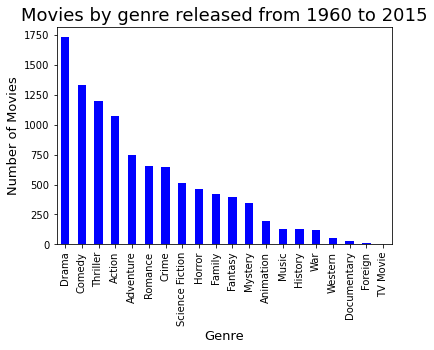

In [29]:
df_MD_genre['split_genre'].value_counts().plot(kind='bar', color='blue')
plt.title('Movies by genre released from 1960 to 2015', size=18)
plt.xlabel('Genre', size=13)
plt.ylabel('Number of Movies', size=13);

The drama genre turned out to be the most popular in the analyzed period of time. But genres such as Documentary and Foreign, on the contrary, took the position of the most unpopular genres as well as TV Movie.


Let's try to approach the answer to this question in terms of income. After all, the higher the income of the film, the more people paid to watch it and, therefore, the more popular type of genre in which it was filmed. To do this, let's take 'revenue_adj', grouped by release date and genre. Then we add visualization.   
*We need to take the 'revenue_adj' data, not the 'revenue' data, because the calculation is made taking into account inflation.*

In [30]:
s_pop_genre_year = df_MD_genre.groupby(['release_year', 'split_genre']).sum().reset_index()#sum values of the genre per year
s_pop_genre_year.tail()

,release_year,split_genre,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
834,2015,Romance,4684324,37.944541,365400000,1673719489,1985,12970,116.1,3.361679e+08,1.539821e+09
835,2015,Science Fiction,4241261,167.082032,2369000004,9609628564,2616,54679,141.3,2.179479e+09,8.840854e+09
836,2015,Thriller,11412614,183.929619,2001800000,7721103825,5187,51480,282.7,1.841655e+09,7.103412e+09
837,2015,War,1258949,9.716191,214000000,692903372,581,3120,33.4,1.968799e+08,6.374708e+08
838,2015,Western,555205,15.009100,179000000,688710620,323,6318,14.6,1.646799e+08,6.336135e+08


For a better display, we take the max value from the already calculated total

In [31]:
max_genre_year = s_pop_genre_year.groupby(['release_year', 'revenue_adj']).max().reset_index()# max from the sum values for a genre per year
max_genre_year.head()

,release_year,revenue_adj,split_genre,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj
0,1960,3.616441e+07,Western,966,1.872132,2000000,4905000,128,224,7.0,1.474593e+07
1,1960,2.359350e+08,Thriller,539,2.610362,806948,32000000,109,1180,8.0,5.949601e+06
2,1960,2.366723e+08,Romance,19257,1.003128,6000000,32100000,216,248,15.1,4.423780e+07
3,1960,4.423780e+08,History,967,1.136943,12000000,60000000,197,211,6.9,8.847561e+07
4,1960,4.785425e+08,Action,1933,3.009075,14000000,64905000,325,435,13.9,1.032215e+08


In [32]:
#Choose the one with the highest income each year
highest_pop_year = max_genre_year.groupby(['release_year']).agg({'revenue_adj' : 'max'}).reset_index()
highest_pop_year.tail()

,release_year,revenue_adj
51,2011,1.021185e+10
52,2012,1.088580e+10
53,2013,9.759025e+09
54,2014,1.210960e+10
55,2015,1.226104e+10


In [33]:
#To find out the most popular genre of each year, let's make a connection between max_genre_year and 'highest_pop_year'.
highest_pop_year = pd.merge(max_genre_year, highest_pop_year, how = 'inner', left_on = ['release_year','revenue_adj'], right_on = ['release_year','revenue_adj'])

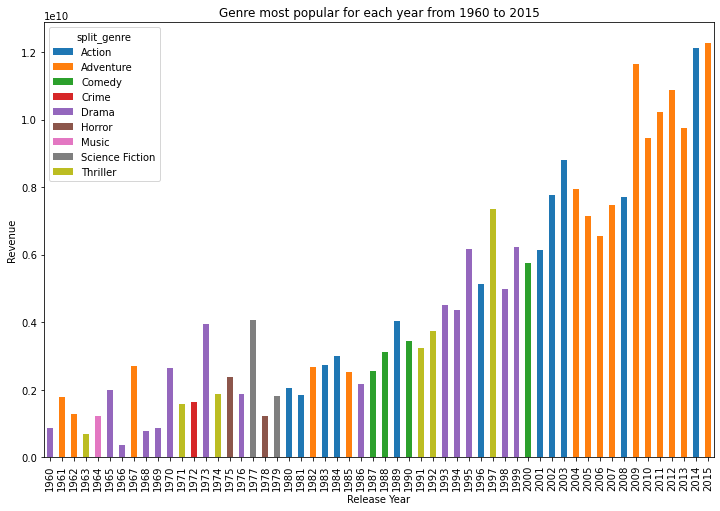

In [34]:
#Let's display the received data on the graph
highest_pop_year.pivot(index='release_year', columns='split_genre', values='revenue_adj').reset_index().plot(kind = 'bar', x='release_year', stacked=True, figsize=(12,8))
plt.xlabel("Release Year")
plt.ylabel("Revenue")
plt.title("Genre most popular for each year from 1960 to 2015")
plt.show();

#### Result: 
- Based on the income from movies, we can also see that the 'Drama' genre ranks first in the majority of the years.   
- We also see that since the early 2000s, popularity has shifted towards 'Adventure' and a bit of 'Action'.

### Research Q 4: What are the top-5 movies with the highest and lowest voted ratings?

To answer this question, we need to use data from the column with the average number of votes

In [35]:
df_MD_clean.agg({'vote_average': ['min', 'max']}) #shows the min and max value in the rating of votes

,vote_average
min,2.2
max,8.4


Since we don't need all the columns, let's create a copy with only the ones we need.

In [36]:
v_ratings = df_MD_clean[['original_title', 'vote_average']].copy()
v_ratings.head() #views the resulting columns

,original_title,vote_average
0,Jurassic World,6.5
1,Mad Max: Fury Road,7.1
2,Insurgent,6.3
3,Star Wars: The Force Awakens,7.5
4,Furious 7,7.3


Let's choose 5 movies with the highest average rating

In [37]:
v_ratings.nlargest(5,['vote_average']) #shows 5 movies with the highest average rating

,original_title,vote_average
4178,The Shawshank Redemption,8.4
7948,Stop Making Sense,8.4
7269,The Godfather,8.3
650,Whiplash,8.2
2409,Fight Club,8.1


#### Now we see the following arrangement of the movies:  
№1 The Shawshank Redemption  
№2 Stop Making Sense   
№3 The Godfather   
№4 Whiplash  
№5 Fight Club

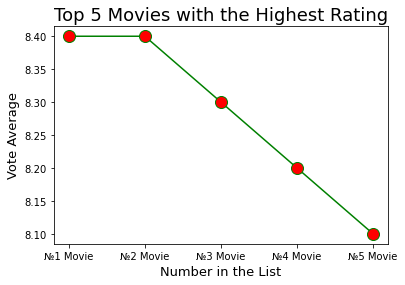

In [38]:
#create the visualization for the Top 5 movies with the highest rating
location = [1, 2, 3, 4, 5]
y = [8.4, 8.4, 8.3, 8.2, 8.1]
x = ['№1 Movie', '№2 Movie', '№3 Movie', '№4 Movie', '№5 Movie']
plt.plot(x, y, color = 'g', linestyle = 'solid', marker = 'o', markerfacecolor = 'r', markersize = 12)
plt.title('Top 5 Movies with the Highest Rating', fontdict = {'fontsize':18})
plt.xlabel('Number in the List', fontdict = {'fontsize':13})
plt.ylabel('Vote Average', fontdict = {'fontsize':13});

Now let's choose 5 movies with the smallest average rating

In [39]:
v_ratings.nsmallest(5,['vote_average']) #shows 5 movies with the lowest average rating

,original_title,vote_average
4859,Foodfight!,2.2
3134,Disaster Movie,3.3
4115,FearDotCom,3.3
4540,Dracula 3D,3.3
5082,House of the Dead,3.4


#### The films are arranged in the following order:  
№1 Foodfight!    
№2 Disaster Movie    
№3 FearDotCom    
№4 Dracula 3D    
№5 House of the Dead

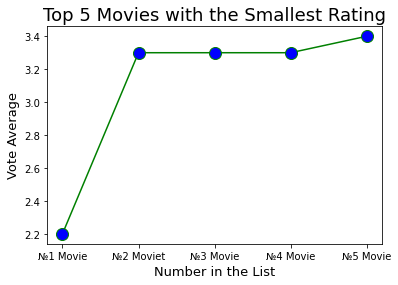

In [40]:
##create the visualization for the Top 5 movies with the lowes rating
location = [1, 2, 3, 4, 5]
y = [2.2, 3.3, 3.3, 3.3, 3.4]
x = ['№1 Movie', '№2 Moviet', '№3 Movie', '№4 Movie', '№5 Movie']
plt.plot(x, y, color = 'g', linestyle = 'solid', marker = 'o', markerfacecolor = 'blue', markersize = 12)
plt.title('Top 5 Movies with the Smallest Rating', fontdict = {'fontsize':18})
plt.xlabel('Number in the List', fontdict = {'fontsize':13})
plt.ylabel('Vote Average', fontdict = {'fontsize':13});

#### Result:  
 - The movies with the highest rating are 'The Shawshank Redemption'(8.4) and 'Stop Making Sense'(8.4).
 - The lowest rated movie is 'Foodfight!'(2.2)

### Research Q 5: Which director made the most films?

Same as with the 'genres' column, multiple directors in the 'director' column are separated by the '|' separator.  
First, let's put everything in the right form.

In [41]:
df_MD_dir = df_MD_clean.copy() #create a copy to keep the original dataset

In [42]:
split_dir = df_MD_dir['director'].str.split('|').apply(pd.Series, 1).stack().reset_index(level=1, drop=True)
split_dir.name = 'split_director'

In [43]:
df_MD_dir = df_MD_dir.drop(['director'], axis=1).join(split_dir) #remove old names and substitute new ones

In [44]:
df_MD_dir.head() #check if everything succeeded

,id,popularity,budget,revenue,original_title,cast,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,split_director
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Colin Trevorrow
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,George Miller
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Robert Schwentke
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,J.J. Abrams
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,James Wan


In [45]:
df_MD_dir['split_director'].value_counts().head(10) #show 10 directors with the most films

Steven Spielberg     28
Clint Eastwood       24
Ridley Scott         21
Woody Allen          18
Robert Rodriguez     17
Martin Scorsese      17
Steven Soderbergh    17
Tim Burton           17
Renny Harlin         15
Brian De Palma       15
Name: split_director, dtype: int64

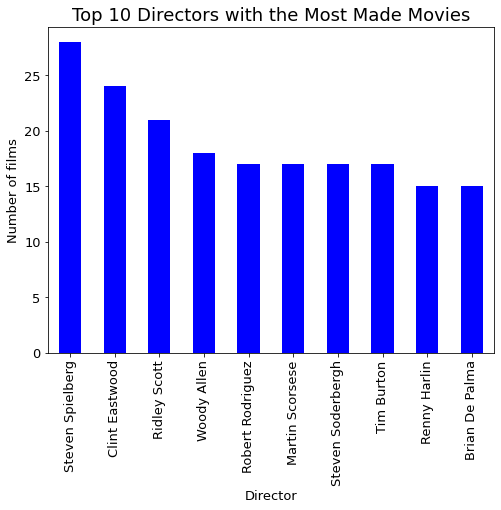

In [46]:
#create visualizations from the top 10 directors with the most films
df_MD_dir['split_director'].value_counts().iloc[:10].plot(kind='bar', color='blue', figsize=(8,6), fontsize=13)
plt.title('Top 10 Directors with the Most Made Movies', fontdict = {'fontsize':18})
plt.xlabel('Director', fontdict = {'fontsize':13})
plt.ylabel('Number of films', fontdict = {'fontsize':13});

#### Result:   
- Steven Spielberg has directed 28 films and thus ranks first in the number of films made from 1960 to 2015.

### Research Q 6: What kinds of properties are associated with the most profitable movies?

To answer this question, we'll look at three dependencies:  
Profit vs Runtime  
Profit vs Budget  
Profit vs Vote Average 
  
*Since we have revenue and budget columns, we will be able to calculate profit.*  
*In the following calculations, we will use 'revenue_adj' and 'budget_adj' columns, because the calculation is accounts the inflation.*

In [47]:
profit = df_MD_clean['revenue_adj'] - df_MD_clean['budget_adj'] #calculate profit
profit.head()

0    1.254446e+09
1    2.101614e+08
2    1.704191e+08
3    1.718723e+09
4    1.210949e+09
dtype: float64

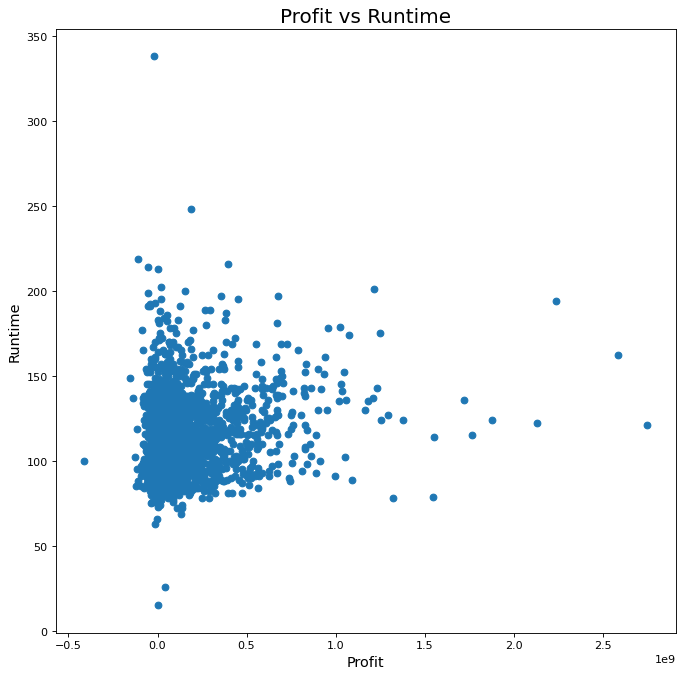

In [48]:
#create visualization Profit vs Runtime
x = profit
y = df_MD_clean['runtime']
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(x, y)
plt.title('Profit vs Runtime', fontsize=18)
plt.xlabel('Profit', fontsize=13)
plt.ylabel('Runtime', fontsize=13);

Profit vs Runtime graph shows that there is not much correlation between the runtime and profit, however we can see that the majority of top 20 of the most profitable movies are 120-130 min in average.

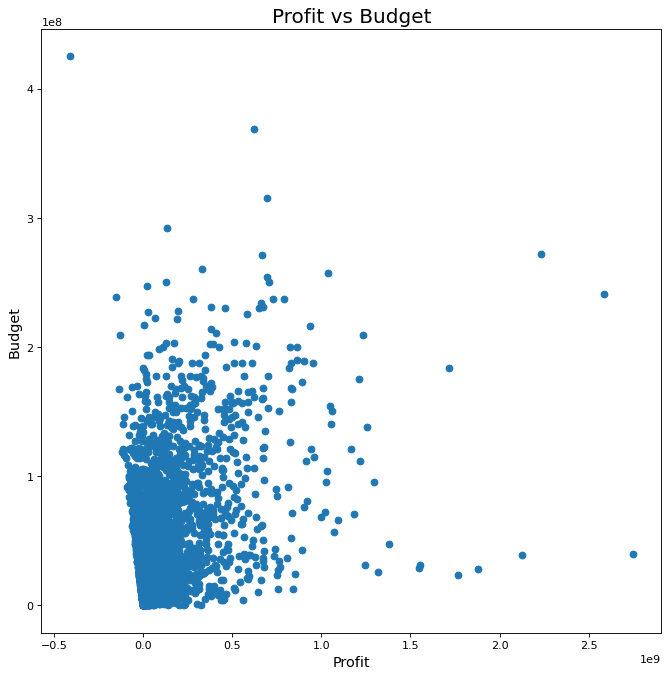

In [49]:
#create visualization Profit vs Budget
x = profit
y = df_MD_clean['budget_adj']
plt.figure(figsize=(10, 10), dpi=80)
plt.scatter(x, y)
plt.title('Profit vs Budget', fontsize=18)
plt.xlabel('Profit', fontsize=13)
plt.ylabel('Budget', fontsize=13);

Profit vs Budget graph also shows that among the 10 of the most profitable movies, only 3 have the budget above 150 million and the other 7 are between 30 to 50M. For the rest of the movies in the dataset we can see that the profit is not proportional to the budget in most cases.

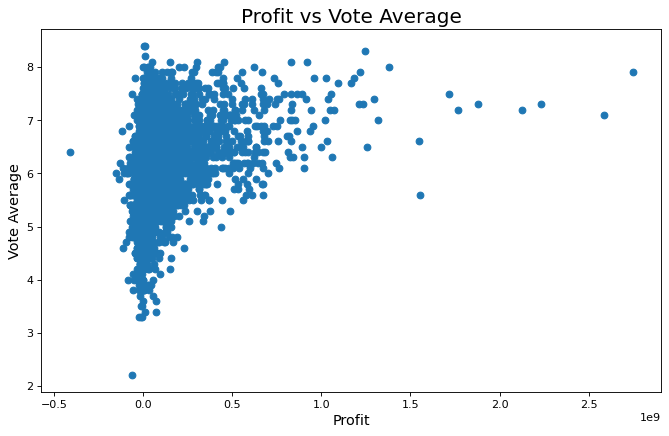

In [50]:
##create visualization Profit vs Vote Average
x = profit
y = df_MD_clean['vote_average']
plt.figure(figsize=(10, 6), dpi=80)
plt.scatter(x, y)
plt.title('Profit vs Vote Average', fontsize=18)
plt.xlabel('Profit', fontsize=13)
plt.ylabel('Vote Average', fontsize=13);

Profit vs Vote Average graph shows that, in general, the average rating of a profitable film is between 6 and 7, however the most profitable movies lay between 7 and 9. Interestingly enough, a couple of the highest rated movies (above 8.5) are almost non-profitable.

<a id='conclusions'></a>
## Conclusions
The analysis performed has a subjective view and refers to this particular dataset that was taken from The Movie Database (TMDb) which is limited to ~10000 entries and has some missing values, zero values, etc. Thus, the obtained conclusions are purely speculative. After analyzing the dataset, we can make the following hypothetical conclusions:  
- Most of the movies released are between 100 and 150 minutes in length.
- Most of the films released were shot with a budget of under 10 million USD.
- Based on the number, as well as the income from the films made, the 'Drama' genre took the leading position in most cases from 1960 to 2015. Although since 2000. it is clearly seen that the preference has shifted towards 'Adventures' and 'Action'.  
- The highest rated films in this data set are 'The Shawshank Redemption'(8.4) and 'Stop Making Sense'(8.4). And the lowest rated film is 'Foodfight!'(2.2).
- We learned that Steven Spielberg ranks first in the number of films shot from 1960 to 2015.
- Also, after analyzing the data, it can be noted that there is no large relationship between the movie runtime and profit, however, we see that most of the 20 most profitable moves average between 120 and 130 minutes. Of the top 10 most profitable films, only 3 have a budget of over 150 million, and the other 7 are between 30 and 50 million. For the rest of the films in the dataset, we see that the profit margins are in most cases out of proportion to the budget. Looking at the profit versus average vote score, we can see that the average rating of a profitable film is usually between 6 and 7, but the most profitable films are between 7 and 9.

In [51]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1